### Criar modelos de Machine Learning com Scikit Learn

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
# Caminho do arquivo
caminhoArquivo = ('./Arquivos/horasDeEstudo.csv')

# Definindo um dataframe
df = pd.read_csv(caminhoArquivo)

# Visualizar o cabeçalho
df.head(1)


,horas_estudo_mes,salario
0,57.0,6813.0


In [97]:
# Visualizar o final do dataframe 

df.tail(1)

,horas_estudo_mes,salario
499,29.0,5236.0


In [98]:
# Visualizar os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [99]:
# Calcula a quantidade de dados nulos

df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [100]:
# Resumo estatístico com dataframe

df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [101]:
# Analisar a correlação entre as variáveis

df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


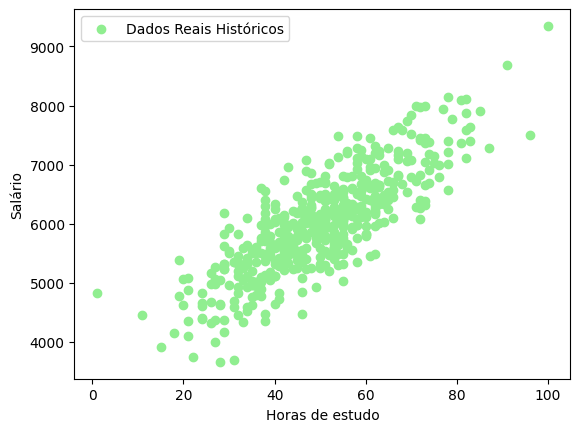

In [102]:
# Criar um gráfico de dispersão

plt.scatter(data=df,                                    # Conjunto de dados
             x='horas_estudo_mes',                      # Variável Preditora
               y= 'salario',                            # Variável Resposta
                 label = 'Dados Reais Históricos',      # Rótulo
                   color= 'lightgreen'                  # Cor
            )

plt.xlabel('Horas de estudo')                           # Título eixo X
plt.ylabel('Salário')                                   # Título eixo Y
plt.legend()                                            # Legenda

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

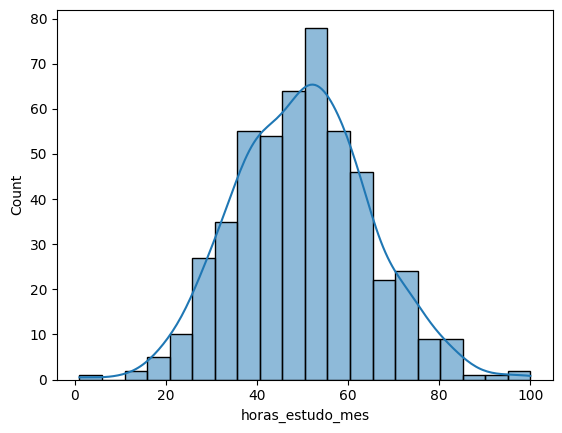

In [103]:
# Contruir um histograma para analisar o comportamento da variável preditora X

sns.histplot(data=df,                   # Conjunto de dados
             x='horas_estudo_mes',      # Variável X
             kde = True                 # Curva de distribuição (Densidade)
             )

### Preparar os dados

In [104]:
# Separar as variáveis 

x = df['horas_estudo_mes']
y = df['salario']

In [105]:
# Verificar o tipo de dado

print(f'O tipo de dado da variável X é {type(x)}')

O tipo de dado da variável X é <class 'pandas.core.series.Series'>


In [106]:
# Verificar a quantidade de elementos

print(f'A quantidade de dados da variável x é {len(x)}')

A quantidade de dados da variável x é 500


In [107]:
# Converter a variável x para uma matriz 1X1

x = np.array(x)


In [108]:
# NP.RESHAPE(LINHAS, COLUNAS)

x = x.reshape(-1,1)

In [109]:
# Separar os dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42) # (variáveis de estudo, tamanho do teste, quantidade de subgrupos)

print('Quantidade de elementos para treino: ', len(x_train))
print('Quantidade de elementos para teste: ', len(x_test))
print('Quantidade total de elementos: ', len(x))

Quantidade de elementos para treino:  400
Quantidade de elementos para teste:  100
Quantidade total de elementos:  500


### Treinar o modelo

In [110]:
# Inicializar o algoritmo para treino

modelo = LinearRegression()

In [111]:
# Treinar o modelo

modelo.fit(x_train, y_train)

LinearRegression()

In [112]:
# Exibir os coeficientes

print('coeficiente angular (a)', modelo.coef_)
print('coeficiente linear (b)', modelo.intercept_)


coeficiente angular (a) [48.18185277]
coeficiente linear (b) 3596.783724372753


### Deploy do modelo

In [124]:
# Inserir os valores para previsão

entrada = int(input('Digite a quantidade de horas dedicadas'))
horasEstudo = np.array([[entrada]])

# Realizar a previsão

salario = modelo.predict(horasEstudo)

# Resultado

print(f'Para {horasEstudo[0][0]} horas aplicadas ao estudo, tem uma possibilidade de receber um salário aproximado de {round(salario[0],2)}')

Para 44 horas aplicadas ao estudo, tem uma possibilidade de receber um salário aproximado de 5716.79
